In [2]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import csv 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

"""
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
"""

"\nnltk.download('punkt')\nnltk.download('stopwords')\nnltk.download('wordnet')\n"

In [3]:
PATH = f'../data/spam/spam.csv'
df = pd.read_csv(PATH, encoding='ISO-8859-1')
df.drop(df.columns[[2,3,4]], axis = 1, inplace = True)
df.columns = ['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 🔎 EDA

In [4]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### 📋 NOTE
* `.groupby()` group DataFrame using a mapper or by a Series of columns

In [5]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
## convert label to a numerical value
df['is_spam'] = df.label.map({'ham': 0, 'spam': 1})
df.head(10)

,label,message,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [7]:
df['length'] = df.message.apply(len)
df.head()

,label,message,is_spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

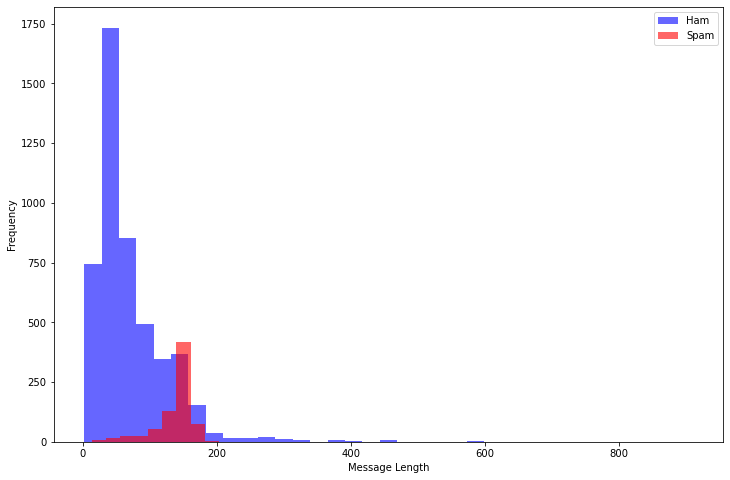

In [8]:
plt.figure(figsize=(12, 8))

df[df.label == 'ham'].length.plot(bins=35, kind='hist', color='blue',
                                label='Ham', alpha=0.6)

df[df.label == 'spam'].length.plot(kind='hist', color='red',
                                label='Spam', alpha=0.6)

plt.legend()
plt.xlabel('Message Length')

> ✓ spam messages has more characters than not-spam(ham) messages.

In [9]:
df[df.label=='ham'].describe()

,is_spam,length
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [10]:
## get max length message in 'ham'
df[df.length==910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [11]:
df[df.label=='spam'].describe()

,is_spam,length
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [12]:
## get max length message in 'spam'
df[df.length==224].message.iloc[0]

'Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of fond souveniers ... You Cougar-Pen'

## 🔁 Data Pre-processing

### 🧩 Main Issue
* data is all in `string` format. But classification algorithms are usually need numerical feature vector
* so we need to convert a copus to a vector format
---
* `bag-of-words` a text is represented as the bag(multiset) of its words 
* disregarding grammar and even word order but keeping multiplicity
* commonly used in document classification
* occurrence of each word is used as a feature for training a classifier

In [13]:
import string 
from nltk.corpus import stopwords

def preprocess(df):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'dosent', 'doin', 'ure']

    ## check characters to see if thery are in punctuation
    no_punc = [char for char in df if char not in string.punctuation]
    no_punc = ''.join(no_punc)

    ## remove stopwords
    return ' '.join([word for word in no_punc.split() if word.lower() not in STOPWORDS])

In [14]:
df.head()

,label,message,is_spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


### 📋 NOTE
* `pd.DataFrame.apply(func)` apply a function along an axis of the DataFrame

In [15]:
df['cleaned'] = df.message.apply(preprocess)

df.head()

,label,message,is_spam,length,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [16]:
type(stopwords.words('english'))

list

In [17]:
from collections import Counter

words = df[df.label=='ham'].cleaned.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for word in words:
    ham_words.update(word)

print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [18]:
words = df[df.label=='spam'].cleaned.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for word in words:
    spam_words.update(word)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


## 🛠 Vectorization
* convert each message([lemmas](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) into a vector that ML model can understand

### 📋 NOTE: `TF-IDF`
* <b>Term Frequency-Inverse Document frequency</b>
* numerical stastics that is intended to reflect <b>how important</b> a word is to a document in a collection or corpus

    1. count how many times does a word occur in each message (term frequency) -> `CountVectorizer()`
    2. weight the counts. frequent tokens get lower weight (inverse document frequency)
    3. normalize that vectors to unit length, to abstract from the original length(L2-norm)

In [19]:
X = df.cleaned
y = df.is_spam

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [20]:
##  split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
vec.fit(X_train)

CountVectorizer()

In [22]:
## learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vec.transform(X_train)

In [23]:
## combine fit and transform into a single step
X_train_dtm = vec.fit_transform(X_train)

In [24]:
## transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vec.transform(X_test)

X_test_dtm

<1393x7930 sparse matrix of type '<class 'numpy.int64'>'
	with 10196 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trans = TfidfTransformer()
tfidf_trans.fit(X_train_dtm)
tfidf_trans.transform(X_train_dtm)

<4179x7930 sparse matrix of type '<class 'numpy.float64'>'
	with 34497 stored elements in Compressed Sparse Row format>

## 🤖 build and evaluate a model

### 📋 NOTE: `Multinomial Naïve bayes`
* probabilistic learning method that mostly used in NLP
* suitable for classification with discrete features
* mostly used in NLP
> P(A|B) = P(A) x P(B|A)/P(B)
---
👍 <b>Advantages</b>
 1. easy to implement as only have to calculate probaility
 2. can use on both continuous and discrete data
 3. can used for predicting real-time application
 4. highly scalable and can easily handle large datasets
---
👎 <b>Disadvantages</b>
 1. prediction accuracy is lower than the other algorithms
 2. it is not suitable for regression. only used for textual data application
 3. cannot be used to predict numeric values
  

In [26]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [27]:
## train model using X_train_dtm 
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [43]:
## prediction for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [29]:
## calculate accuracy
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.9798994974874372

In [30]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1195,    7],
       [  21,  170]])

In [31]:
X_test.shape

(1393,)

In [32]:
## print meesage for false positives (spam incorrectly classfier)
X_test[y_pred_class > y_test]

4700                                     liked new mobile
1505    Total video converter free download type googl...
3362                                                 free
4417                                        get free call
5044    sent JD Customer Service cum Accounts Executiv...
2418    Madamregret disturbancemight receive reference...
75                               waiting machan Call free
Name: cleaned, dtype: object

In [33]:
## print meesage for false negatives (spam incorrectly classfier)
X_test[y_pred_class < y_test]

3979                                   ringtoneking 84484
1268    get phone wanna chat set meet Call 09096102316...
730     Email AlertFrom Jeri StewartSize 2KBSubject Lo...
2662    Hello darling today would love chat tell look ...
4296    thesmszonecom lets send free anonymous masked ...
1468    Hi LUCY Hubby meetins day Fri B alone hotel fa...
787     Ever thought living good life perfect partner ...
4371    balance å£600 Next question Complete landmark ...
1894    FreeMsg Hey got 1 videopic fones reply WILD tx...
2819    INTERFLORA åÒIts late order Interflora flowers...
1892    CALL 09090900040 LISTEN EXTREME DIRTY LIVE CHA...
3740                                         22 146tf150p
4211    Missed call alert numbers called left message ...
4796    Santa calling Would little ones like call Sant...
1874         Would like see XXX pics hot nearly banned uk
2963    ever notice youre driving anyone going slower ...
4674    Hi babe Chloe r smashed saturday night great w...
2268          

In [34]:
## calculate predicted probabilities for V_test_dtm 
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob 

array([1.57473278e-03, 8.92955566e-06, 9.99132461e-01, ...,
       1.16655129e-08, 1.61496108e-05, 9.74254785e-02])

In [35]:
## calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9763940552830797

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', MultinomialNB())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [37]:
y_pred = pipe.predict(X_test)

In [38]:
metrics.accuracy_score(y_test, y_pred)

0.9641062455132807

In [39]:
metrics.confusion_matrix(y_test, y_pred)

array([[1202,    0],
       [  50,  141]])

## 👀 Comparing models

compare multinomial naïve bayes with [logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')

In [41]:
%%time 
log_reg.fit(X_train_dtm,  y_train)

CPU times: user 26.5 ms, sys: 5.08 ms, total: 31.5 ms
Wall time: 14.2 ms


LogisticRegression(solver='liblinear')

In [44]:
## predictions for X_test_dtm 
y_pred_class = log_reg.predict(X_test_dtm)

In [45]:
## calculate predicted prob. for X_test_dtm 
y_pred_prob = log_reg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.03531711, 0.0420397 , 0.43729085, ..., 0.00122235, 0.00471771,
       0.06161036])

In [46]:
## calculate acc. 
metrics.accuracy_score(y_test, y_pred_class)

0.9755922469490309

In [47]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1201,    1],
       [  33,  158]])

In [48]:
## calculate AUC 
metrics.roc_auc_score(y_test, y_pred_prob)

0.9880500213431368